# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
df = df.drop(columns='Unnamed: 32')
print(df.shape)
df.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [3]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

In [0]:
from sklearn import decomposition

In [0]:
#Step 1: Standardize the Dataset

X = df.iloc[:,1:].values #convert the data into a numpy array, skip the id column (start at column 1)


In [0]:
#using standard scaler:
scaled_X = StandardScaler().fit_transform(X)

In [7]:
covar_matrix = PCA(n_components = 30) #we have 30 features

covar_matrix.fit(scaled_X)
                
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

cumulative_var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

cumulative_var

array([ 44.3,  63.3,  72.7,  79.3,  84.8,  88.8,  91.1,  92.7,  94.1,
        95.3,  96.3,  97.2,  98. ,  98.5,  98.8,  99.1,  99.3,  99.5,
        99.7,  99.8,  99.9, 100. , 100.1, 100.2, 100.3, 100.3, 100.3,
       100.3, 100.3, 100.3])

In [0]:
# create the PCA instance, start w/ 2
pca = PCA(2)

two_principal_components = pca.fit_transform(scaled_X)

#convert to pandas df:
two_component_df = pd.DataFrame(data = two_principal_components, columns = ['component_1', 'component_2'])

In [9]:
two_component_df.head()

,component_1,component_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


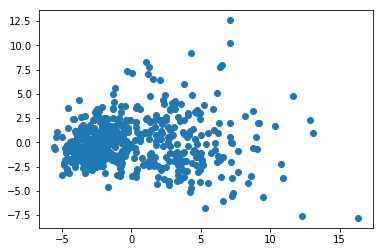

In [10]:
plt.scatter(two_component_df.component_1, two_component_df.component_2)
plt.show()

###Now lets do 3, 4, 5 pca:

In [11]:
# create the PCA instance, pca=3
pca = PCA(3)

three_principal_components = pca.fit_transform(scaled_X)

#convert to pandas df:
three_component_df = pd.DataFrame(data = three_principal_components, columns = ['component_1', 'component_2', 'component_3'])
three_component_df.head()

,component_1,component_2,component_3
0,9.192837,1.948583,-1.123164
1,2.387802,-3.768172,-0.529290
2,5.733896,-1.075174,-0.551747
3,7.122953,10.275589,-3.232787
4,3.935302,-1.948072,1.389768


In [12]:
# create the PCA instance, pca=4
pca = PCA(4)

four_principal_components = pca.fit_transform(scaled_X)

#convert to pandas df:
four_component_df = pd.DataFrame(data = four_principal_components, columns = ['component_1', 'component_2', 'component_3', 'component_4'])
four_component_df.head()

,component_1,component_2,component_3,component_4
0,9.192837,1.948583,-1.123162,3.633735
1,2.387802,-3.768172,-0.529293,1.118263
2,5.733896,-1.075174,-0.551750,0.912080
3,7.122953,10.275589,-3.232788,0.152549
4,3.935302,-1.948072,1.389764,2.940637


In [13]:
# create the PCA instance, pca=5
pca = PCA(5)

five_principal_components = pca.fit_transform(scaled_X)

#convert to pandas df:
five_component_df = pd.DataFrame(data = five_principal_components, columns = ['component_1', 'component_2', 'component_3', 'component_4', 'component_5'])
five_component_df.head()

,component_1,component_2,component_3,component_4,component_5
0,9.192837,1.948583,-1.123166,3.633727,-1.195110
1,2.387802,-3.768172,-0.529293,1.118270,0.621775
2,5.733896,-1.075174,-0.551747,0.912079,-0.177086
3,7.122953,10.275589,-3.232790,0.152548,-2.960879
4,3.935302,-1.948072,1.389767,2.940640,0.546748


###K-Means clustering: first we'll do the 2-component PCA:

In [15]:
#start by trying to cluster into 2 groups, malignant/benign, so k=2:

kmeans = KMeans(n_clusters=2)
kmeans.fit(two_principal_components)
labels = kmeans.labels_

print(labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [16]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
two_component_df['pca2_labels'] = new_series.values

two_component_df.head()

,component_1,component_2,pca2_labels
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


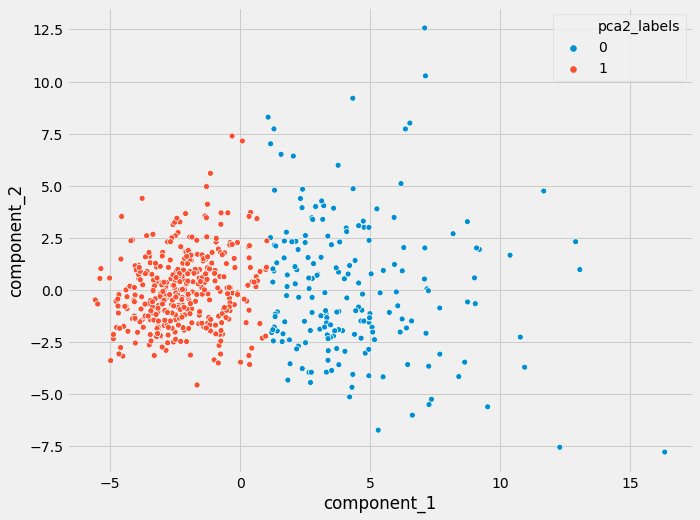

In [17]:
#plot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=two_component_df.component_1, y=two_component_df.component_2, hue=two_component_df.pca2_labels, ax=ax)
plt.show()

###Now kmeans=2 for pca 3, 4, 5 

In [18]:
#add labels for pca 3

kmeans = KMeans(n_clusters=2)
kmeans.fit(three_principal_components)
labels = kmeans.labels_

new_series = pd.Series(labels)
three_component_df['labels'] = new_series.values
three_component_df.head()

,component_1,component_2,component_3,labels
0,9.192837,1.948583,-1.123164,0
1,2.387802,-3.768172,-0.529290,0
2,5.733896,-1.075174,-0.551747,0
3,7.122953,10.275589,-3.232787,0
4,3.935302,-1.948072,1.389768,0


In [20]:
#add labels for pca 4

kmeans = KMeans(n_clusters=2)
kmeans.fit(four_principal_components)
labels = kmeans.labels_

new_series = pd.Series(labels)
four_component_df['labels'] = new_series.values
four_component_df.head()

,component_1,component_2,component_3,component_4,labels
0,9.192837,1.948583,-1.123162,3.633735,0
1,2.387802,-3.768172,-0.529293,1.118263,0
2,5.733896,-1.075174,-0.551750,0.912080,0
3,7.122953,10.275589,-3.232788,0.152549,0
4,3.935302,-1.948072,1.389764,2.940637,0


In [28]:
#add labels for pca 5

kmeans = KMeans(n_clusters=2)
kmeans.fit(five_principal_components)
labels = kmeans.labels_

new_series = pd.Series(labels)
five_component_df['labels'] = new_series.values
five_component_df.head()

,component_1,component_2,component_3,component_4,component_5,labels
0,9.192837,1.948583,-1.123166,3.633727,-1.195110,0
1,2.387802,-3.768172,-0.529293,1.118270,0.621775,0
2,5.733896,-1.075174,-0.551747,0.912079,-0.177086,0
3,7.122953,10.275589,-3.232790,0.152548,-2.960879,0
4,3.935302,-1.948072,1.389767,2.940640,0.546748,0


# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

###Lets add the diagnosis label back in and check for accuracy of our kmeans clusters:


In [0]:
diagnosis = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")['diagnosis']

In [0]:
two_component_df['diagnosis'] = diagnosis.values

In [34]:
#clustered labels (predictions)
two_component_df.pca2_labels.value_counts()

1    378
0    191
Name: pca2_labels, dtype: int64

In [32]:
#actual diagnosis labels:
two_component_df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

###So here 0 corresponds with malignancy, 1 indicates benign: lets re-encode diagnosis to 0/1's, then make a new column whether it was clustered correctly, then plot the clusters again and highlight which were incorrect to see if they fall along the border where the groups sort of overlap/merge:


***Note*** I noticed when re-running the kmeans clustering algorithm, sometimes it flip-flops which variabels get assigned 1s vs 0s.. i just tried to standardize for each time i used it so that 0 would correspond with malignancy, by re-running the kmeans cell until it assigned in the grouping I wanted.

In [0]:
two_component_df.diagnosis.replace({'M': 0, 'B': 1}, inplace=True)

In [0]:
for i in range(len(two_component_df)):
  if two_component_df.at[i, 'pca2_labels'] == two_component_df.at[i, 'diagnosis']:
    two_component_df.at[i, 'pca2_accuracy'] = two_component_df.at[i, 'pca2_labels']
  else:
    two_component_df.at[i, 'pca2_accuracy'] = 2

In [37]:
two_component_df.pca2_accuracy.value_counts()

1.0    341
0.0    175
2.0     53
Name: pca2_accuracy, dtype: int64

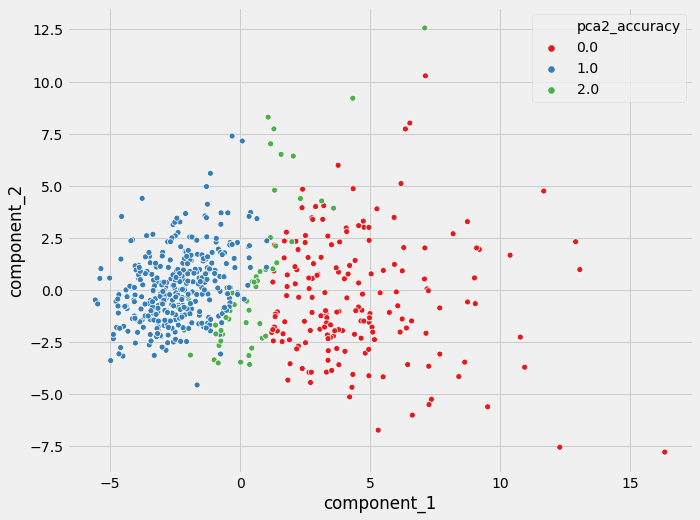

In [38]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette("Set1", n_colors=3)
sns.scatterplot(x=two_component_df.component_1, y=two_component_df.component_2, hue=two_component_df.pca2_accuracy, ax=ax,palette=colors)
plt.show()

###Lets look at kmeans clusters of 3 and 4 for the 2comp pca:

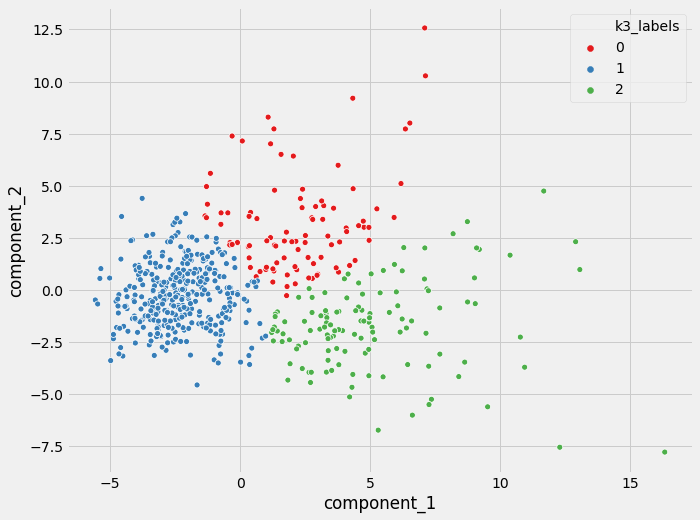

In [39]:
#3 clusters:

kmeans = KMeans(n_clusters=3)
kmeans.fit(two_principal_components)
labels = kmeans.labels_

new_series = pd.Series(labels)
two_component_df['k3_labels'] = new_series.values

#plot:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette("Set1", n_colors=3)
sns.scatterplot(x=two_component_df.component_1, y=two_component_df.component_2, hue=two_component_df.k3_labels, ax=ax, palette=colors)
plt.show()

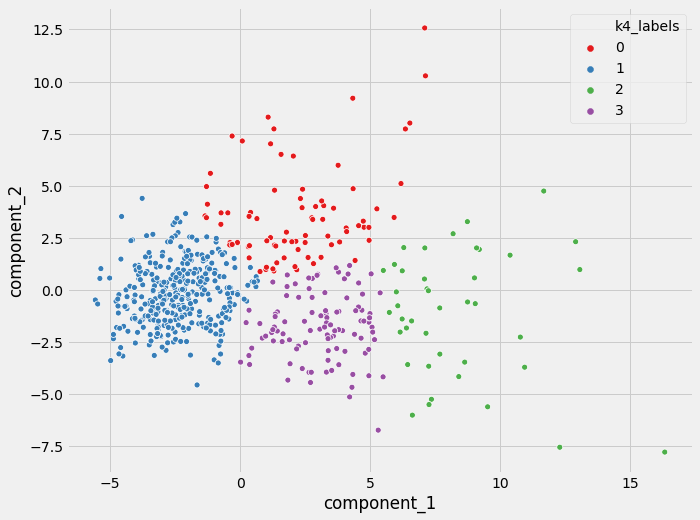

In [40]:
#4 clusters:


kmeans = KMeans(n_clusters=4)
kmeans.fit(two_principal_components)
labels = kmeans.labels_

new_series = pd.Series(labels)
two_component_df['k4_labels'] = new_series.values

#plot:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
colors = sns.color_palette("Set1", n_colors=4)
sns.scatterplot(x=two_component_df.component_1, y=two_component_df.component_2, hue=two_component_df.k4_labels, ax=ax, palette=colors)
plt.show()

###Lastly, lets compare accuracy using pca 3, 4, and 5, with kmeans=2 so just classifying malignant/benign. We'll just use the plots for the pca=2, but will color code the diagnosis with labels from pca 3, 4 and 5

In [42]:
#use two_component_df as main df, add columns for labels from pca 3,4,5

two_component_df['pca3_labels'] = three_component_df.labels
two_component_df['pca4_labels'] = four_component_df.labels
two_component_df['pca5_labels'] = five_component_df.labels

two_component_df.head()

,component_1,component_2,pca2_labels,diagnosis,pca2_accuracy,k3_labels,k4_labels,pca3_labels,pca4_labels,pca5_labels
0,9.192837,1.948583,0,0,0.0,2,2,0,0,0
1,2.387802,-3.768172,0,0,0.0,2,3,0,0,0
2,5.733896,-1.075174,0,0,0.0,2,2,0,0,0
3,7.122953,10.275589,0,0,0.0,0,0,0,0,0
4,3.935302,-1.948072,0,0,0.0,2,3,0,0,0


In [0]:
for i in range(len(two_component_df)):
  if two_component_df.at[i, 'pca3_labels'] == two_component_df.at[i, 'diagnosis']:
    two_component_df.at[i, 'pca3_accuracy'] = two_component_df.at[i, 'pca3_labels']
  else:
    two_component_df.at[i, 'pca3_accuracy'] = 2
  if two_component_df.at[i, 'pca4_labels'] == two_component_df.at[i, 'diagnosis']:
    two_component_df.at[i, 'pca4_accuracy'] = two_component_df.at[i, 'pca4_labels']
  else:
    two_component_df.at[i, 'pca4_accuracy'] = 2
  if two_component_df.at[i, 'pca5_labels'] == two_component_df.at[i, 'diagnosis']:
    two_component_df.at[i, 'pca5_accuracy'] = two_component_df.at[i, 'pca5_labels']
  else:
    two_component_df.at[i, 'pca5_accuracy'] = 2
  

In [44]:
two_component_df.pca3_accuracy.value_counts()

1.0    343
0.0    175
2.0     51
Name: pca3_accuracy, dtype: int64

In [45]:
two_component_df.pca4_accuracy.value_counts()

1.0    343
0.0    175
2.0     51
Name: pca4_accuracy, dtype: int64

In [46]:
two_component_df.pca5_accuracy.value_counts()

1.0    343
0.0    175
2.0     51
Name: pca5_accuracy, dtype: int64

###Interestingly, going from 2 to 3,4 and 5 components of the pca didnt increase the accuracy of the benign vs malignant classification at all. Also, it appears to misdiagnose the same observations.